## Importar las librerías necesarias

In [3]:
import numpy as np
import pandas as pd

### Carga de datos del CSV y extracción de arrays

In [4]:
data = pd.read_csv("../m3-caso_practico_numpy/videojuegos.csv")
data.head(2)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24


In [5]:
columna_rank = np.array(data['Rank'])
columna_name = np.array(data['Name'])
columna_platform = np.array(data['Platform'])
columna_year = np.array(data['Year'])
columna_genre = np.array(data['Genre'])
columna_publisher = np.array(data['Publisher'])
columna_na_sales = np.array(data['NA_Sales'])
columna_eu_sales = np.array(data['EU_Sales'])
columna_jp_sales = np.array(data['JP_Sales'])
columna_other_sales = np.array(data['Other_Sales'])
columna_global_sales = np.array(data['Global_Sales'])

In [6]:
print(columna_rank[:5])
print(columna_name[:5])
print(columna_platform[:5])
print(columna_year[:5])
print(columna_genre[:5])
print(columna_publisher[:5])
print(columna_na_sales[:5])
print(columna_eu_sales[:5])
print(columna_jp_sales[:5])
print(columna_other_sales[:5])
print(columna_global_sales[:5])

[1 2 3 4 5]
['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' 'Wii Sports Resort'
 'Pokemon Red/Pokemon Blue']
['Wii' 'NES' 'Wii' 'Wii' 'GB']
[2006. 1985. 2008. 2009. 1996.]
['Sports' 'Platform' 'Racing' 'Sports' 'Role-Playing']
['Nintendo' 'Nintendo' 'Nintendo' 'Nintendo' 'Nintendo']
[41.49 29.08 15.85 15.75 11.27]
[29.02  3.58 12.88 11.01  8.89]
[ 3.77  6.81  3.79  3.28 10.22]
[8.46 0.77 3.31 2.96 1.  ]
[82.74 40.24 35.82 33.   31.37]


### 3.1 Análisis de las ventas globales
Calcular el Promedio, la mediana, la moda y la desviación estándar

In [13]:
media = np.mean(columna_global_sales)
media

0.5374406555006628

In [8]:
mediana = np.median(columna_global_sales)
mediana

0.17

In [11]:
# He utilizado pandas porque con numpy no he podido sacar la moda
moda = data['Global_Sales'].mode().values 
moda

array([0.02])

In [ ]:
desviacion_estandar = np.std(columna_global_sales)
desviacion_estandar

1.5549810910296606

### 3.2 Análisis de ventas por género
Encontrar los tres videojuegos con mayores ventas


In [ ]:
ventas_por_genero = data.groupby('Genre')['Global_Sales'].sum()
generos_top = ventas_por_genero.sort_values(ascending=False)
top_tres_generos = generos_top.head(3)
for genero, ventas in top_tres_generos.items():
    print(f"- {genero}: {ventas}")

- Action: 1751.18
- Sports: 1330.93
- Shooter: 1037.37


### 3.3 Análisis de ventas por año
Encontrar el año con mayores ventas

In [ ]:
columna_year = columna_year[~np.isnan(columna_year)]
columna_global_sales = columna_global_sales[~np.isnan(columna_global_sales)]
anio_top = columna_year[np.argmax(columna_global_sales)]
ventas_top = np.max(columna_global_sales)
print(f"Año: {anio_top}")
print(f"Ventas globales: {ventas_top}")

Año: 2006.0
Ventas globales: 82.74


### 3.4 Análisis de ventas por platafotma
La plataforma que generó las mayores ventas globales

In [ ]:
ventas_por_plataforma = data.groupby('Platform')['Global_Sales'].sum()
plataforma_top = ventas_por_plataforma.idxmax()
ventas_top = ventas_por_plataforma.max()
print(f"Plataforma: {plataforma_top}")
print(f"Ventas globales: {ventas_top}")

Plataforma: PS2
Ventas globales: 1255.64


### 3.5 Análisis de ventas por editor
Encontrar el editor que generó mayores ventas

In [ ]:
ventas_por_editor = data.groupby('Publisher')['Global_Sales'].sum()
editor_top = ventas_por_editor.idxmax()
ventas_top = ventas_por_editor.max()
print(f"Editor: {editor_top}")
print(f"Ventas globales: {ventas_top}")

Editor: Nintendo
Ventas globales: 1786.56


### 3.6 Comparación de ventas entre plataformas
Comparar las ventas globales de los videojuegos de las consolas Nintendo y Sony

In [10]:
nintendo_games = data[data['Platform'] == 'Nintendo']
sony_games = data[data['Platform'] == 'Sony']
nintendo_global_sales = np.sum(nintendo_games['Global_Sales'].values)
sony_global_sales = np.sum(sony_games['Global_Sales'].values)

if nintendo_global_sales > sony_global_sales:
    print("Nintendo ha tenido mayores ventas globales.")
elif nintendo_global_sales < sony_global_sales:
    print("Sony ha tenido mayores ventas globales.")
else:
    print("Nintendo y Sony han tenido ventas globales similares.")

Nintendo y Sony han tenido ventas globales similares.


### 3.7 Análisis temporal de las ventas globales
Calcular las ventas globales de videojuiegos por cada año

In [ ]:
data = pd.read_csv("../m3-caso_practico_numpy/videojuegos.csv")
data.head(2)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24


<Axes: title={'center': 'Ventas Globales de Videojuegos por Año'}, xlabel='Año', ylabel='Ventas Globales'>

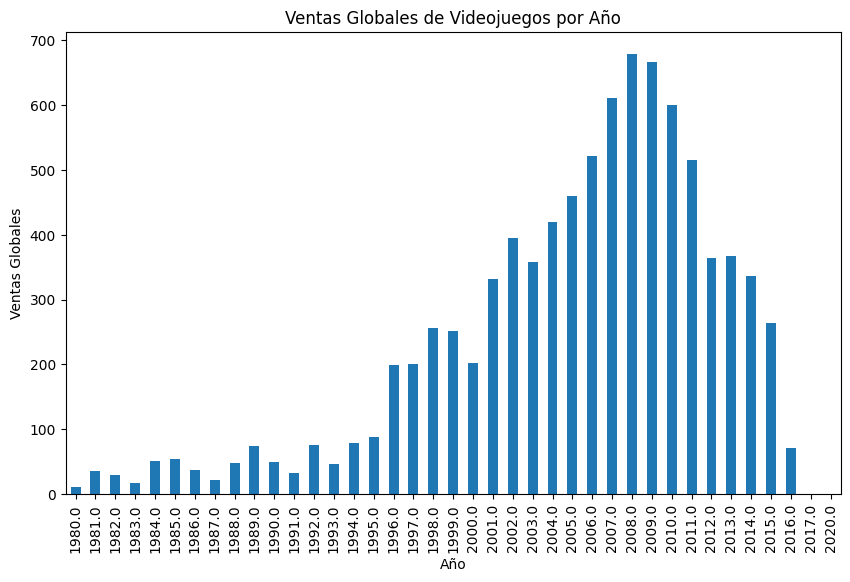

In [ ]:
ventas_por_año = data.groupby('Year')['Global_Sales'].sum()

ventas_por_año.plot(kind='bar', figsize=(10, 6), 
                    xlabel='Año', ylabel='Ventas Globales', 
                    title='Ventas Globales de Videojuegos por Año')


### 3.8 Análisis de ventas por nombre de juego
El juego que ha generado mayores ventas globales

In [ ]:
data_ordenado = data.sort_values(by='Global_Sales', ascending=False)
juego_mayor_ventas = data_ordenado.iloc[0]['Name']
ventas_mayores = data_ordenado.iloc[0]['Global_Sales']
print(f"El juego con mayores ventas globales es: {juego_mayor_ventas} {ventas_mayores}")


El juego con mayores ventas globales es: Wii Sports 82.74


### 3.9 Análisis de ventas por género y plataforma
Encontrar la plataforma que ha generado las mayores ventas para el género Sport

In [ ]:
videojuegos_sports = data[data['Genre'] == 'Sports']
ventas_por_plataforma = videojuegos_sports.groupby('Platform')['Global_Sales'].sum()
plataforma_top = ventas_por_plataforma.idxmax()
print(f"La plataforma con mayores ventas de  género 'Sports' es: {plataforma_top}")


La plataforma con mayores ventas de  género 'Sports' es: Wii
